In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls | grep \.csv$

Kosmo Emery Crouch_diaper.csv
Kosmo Emery Crouch_formula.csv
Kosmo Emery Crouch_growth.csv
Kosmo Emery Crouch_milestone.csv
Kosmo Emery Crouch_nursing.csv
Kosmo Emery Crouch_other_activity.csv
Kosmo Emery Crouch_pumped.csv
Kosmo Emery Crouch_sleep.csv
pump.csv


In [5]:
diaper = pd.read_csv("Kosmo Emery Crouch_diaper.csv")
formula = pd.read_csv("Kosmo Emery Crouch_formula.csv")
milestone = pd.read_csv("Kosmo Emery Crouch_milestone.csv")
growth = pd.read_csv("Kosmo Emery Crouch_growth.csv")
nursing = pd.read_csv("Kosmo Emery Crouch_nursing.csv")
pumped = pd.read_csv("Kosmo Emery Crouch_pumped.csv")
sleep = pd.read_csv("Kosmo Emery Crouch_sleep.csv")

In [6]:
pumped["Amount (ml)"].sum()

27579

In [7]:
formula["Amount (ml)"].sum()

32795

In [8]:
diaper

,Baby,Time,Status,Note
0,Kosmo Emery Crouch,"2022/8/25, 15:05",Wet,NaN
1,Kosmo Emery Crouch,"2022/8/25, 10:41",Mixed,NaN
2,Kosmo Emery Crouch,"2022/8/25, 10:07",Wet,NaN
3,Kosmo Emery Crouch,"2022/8/25, 07:43",Wet,NaN
4,Kosmo Emery Crouch,"2022/8/25, 02:25",Wet,NaN
...,...,...,...,...
761,Kosmo Emery Crouch,"2022/5/23, 01:13",Wet,NaN
762,Kosmo Emery Crouch,"2022/5/22, 21:54",Wet,NaN
763,Kosmo Emery Crouch,"2022/5/22, 18:00",Wet,NaN
764,Kosmo Emery Crouch,"2022/5/22, 01:09",Dirty,Lots black shit while changing


In [9]:
diaper.Status.value_counts()["Mixed"] + diaper.Status.value_counts()["Dirty"]

236

In [10]:
milestone

,Baby,Time,Milestone,Note
0,Kosmo Emery Crouch,"2022/5/24, 16:00",Back home,NaN


In [11]:
growth.iloc[-1]

Baby         Kosmo Emery Crouch
Time           2022/5/21, 15:13
Length                    50 cm
Weight                 3.445 kg
Head Size                  0 cm
Note                        NaN
Name: 64, dtype: object

In [104]:
from datetime import datetime

In [116]:
datetime.strptime(growth["Time"].iloc[20][:-7], '%Y/%m/%d')

ValueError: time data '2022/7/29' does not match format '%y/%m/%d'

In [29]:
float(growth["Weight"].iloc[0][:-3])

6.854

In [75]:
growth["kg"] = growth["Weight"].apply(lambda x: float(x[:-3]))


In [124]:
growth["new_Time"] = growth["Time"].apply(lambda x: datetime.strptime(x[:-7], '%Y/%m/%d'))

In [125]:
growth["new_Time"]

0    2022-08-25
1    2022-08-23
2    2022-08-20
3    2022-08-18
4    2022-08-17
        ...    
60   2022-05-28
61   2022-05-27
62   2022-05-26
63   2022-05-25
64   2022-05-21
Name: new_Time, Length: 62, dtype: datetime64[ns]

In [122]:
datetime.strptime(growth["new_Time"].iloc[1], '%Y/%m/%d')

datetime.datetime(2022, 8, 23, 0, 0)

In [79]:
growth.drop(growth[growth["kg"] == 0].index, inplace = True)

In [80]:
growth["Weightkg"] != 0

0     True
1     True
2     True
3     True
4     True
      ... 
60    True
61    True
62    True
63    True
64    True
Name: Weightkg, Length: 62, dtype: bool

In [129]:
import streamlit as st

In [134]:
growth.columns

Index(['Baby', 'Time', 'Length', 'Weight', 'Head Size', 'Note', 'kg',
       'new_Time'],
      dtype='object')

In [136]:
data = [growth["Time"], growth["kg"]]

In [137]:
st.line_chart(data = data)

StreamlitAPIException: ("Expected bytes, got a 'float' object", 'Conversion failed for column value with type object')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

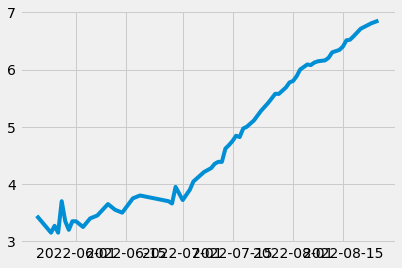

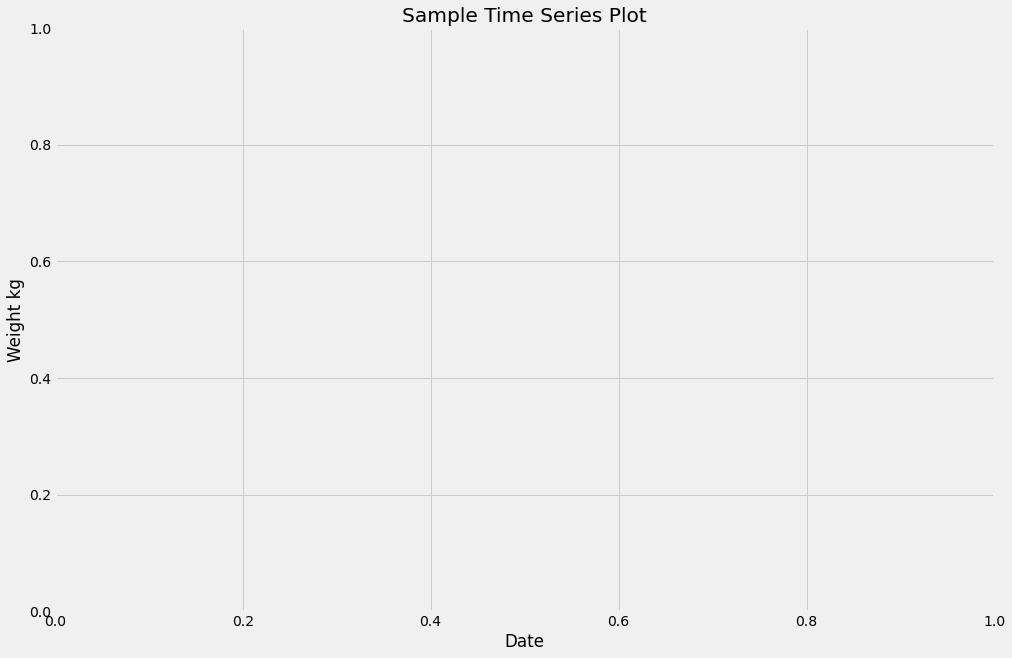

In [140]:
fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
plt.xlabel("Date")
plt.ylabel("Weight kg")
plt.title("Sample Time Series Plot")
ax.plot(growth["new_Time"], growth["kg"])
st.pyplot(fig)

In [96]:
sleep["Duration(minutes)"].max()

310

In [14]:
### to do
average number of poops
amount grown
amount eaten vs growth
change theme pip install jupyterthemes


SyntaxError: invalid syntax (3758538127.py, line 2)

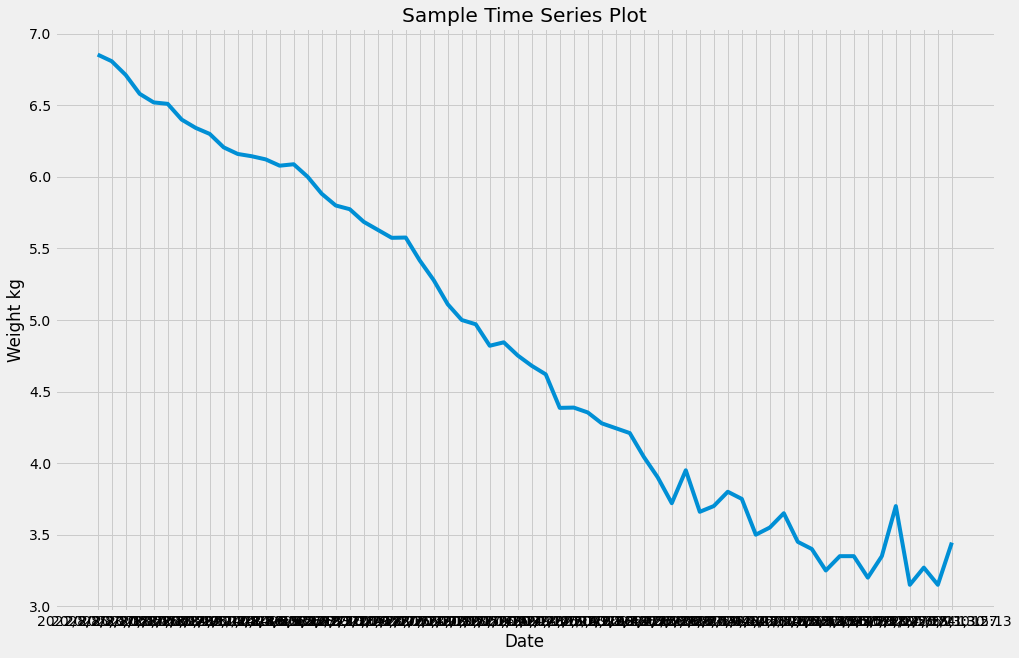

In [98]:
growth = pd.read_csv("Kosmo Emery Crouch_growth.csv")
growth["kg"] = growth["Weight"].apply(lambda x: float(x[:-3]))
growth.drop(growth[growth["kg"] == 0].index, inplace = True)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
plt.xlabel("Date")
plt.ylabel("Weight kg")
plt.title("Sample Time Series Plot")
plt.plot(growth["Time"], growth["kg"])
